<a href="https://colab.research.google.com/github/VIDHYADHARAN-N-M/OIBSIP/blob/main/OASIS_DATASCIENCE_TASK1_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IRIS FLOWER CLASSIFICATION**

**NAME - VIDHYADHARAN N M**

**BATCH - November-P2**

**INTERNSHIP@OASIS-DATASCIENCE**

# Import dataset




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset by read_csv
df=pd.read_csv("/content/Iris.csv");
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#Data preprocessing

In [ ]:
#finding shape of the dataset
df.shape

(150, 6)

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#description of dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#checking for null values
null=df.isnull().sum()
print("Null value present in this dataset is",null)

Null value present in this dataset is Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
null.sum()

0

There is no null values in this dataset


---



In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

`Target variable is species`



In [ ]:
name=df["Species"].unique()
print("Name of the flower species are:",name)

Name of the flower species are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#EDA

*Data Visualization*




In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

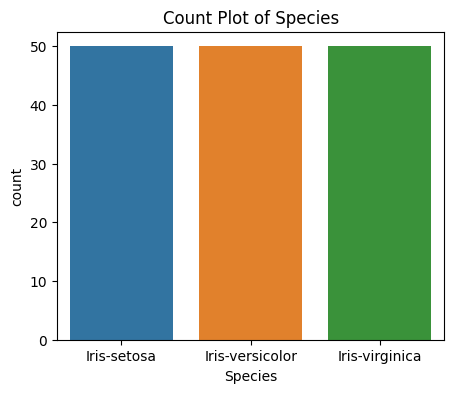

In [ ]:
df['Species'] = df['Species'].astype('category')
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Species')
plt.title('Count Plot of Species')
plt.show()

We have 150 rows in which 50 belong to Iris-setosa, 50 belong to Iris-Versicolor, and the remaining 50 belong to Iris_virginica.

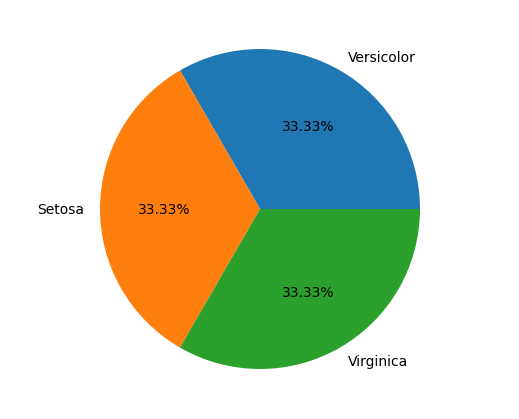

In [ ]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

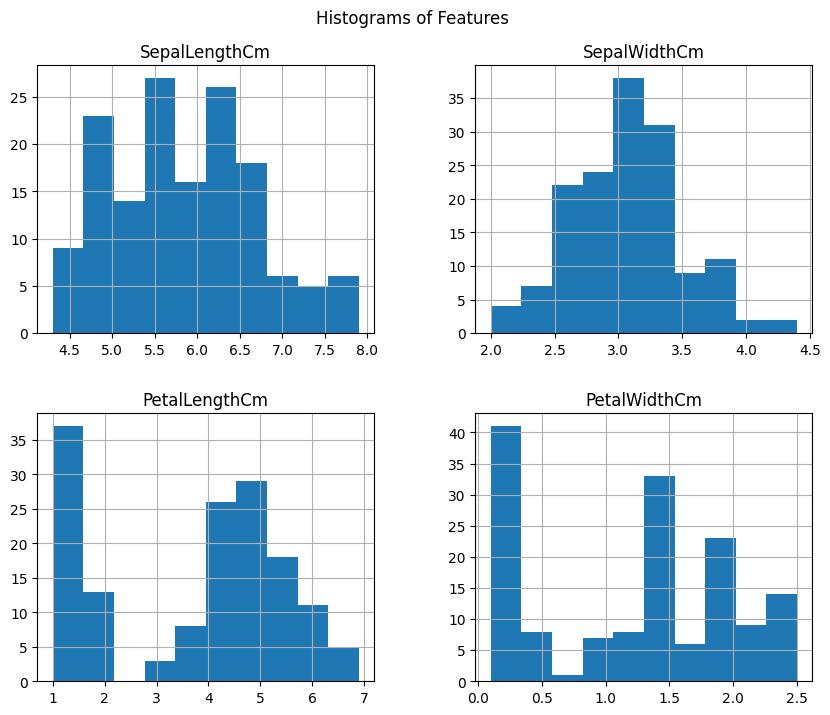

In [ ]:
#Histogram
col_to_plot = [col for col in df.columns if col != 'Id']
df[col_to_plot].hist(figsize=(10, 8))
plt.suptitle("Histograms of Features", y=0.95)
plt.show()

SepalLengthCm       Axes(0.125,0.53;0.133621x0.35)
SepalWidthCm     Axes(0.285345,0.53;0.133621x0.35)
PetalLengthCm     Axes(0.44569,0.53;0.133621x0.35)
PetalWidthCm     Axes(0.606034,0.53;0.133621x0.35)
dtype: object

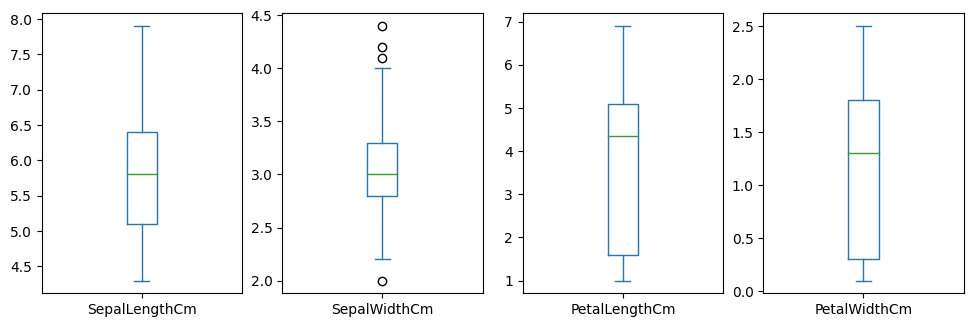

In [ ]:
df1 = df.drop(columns=['Id'])
df1.plot(kind ='box',subplots = True, layout =(2,5),sharex = False,figsize=(15,8))

In [ ]:
#Correlation between features
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-270-136bf2c8dea0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


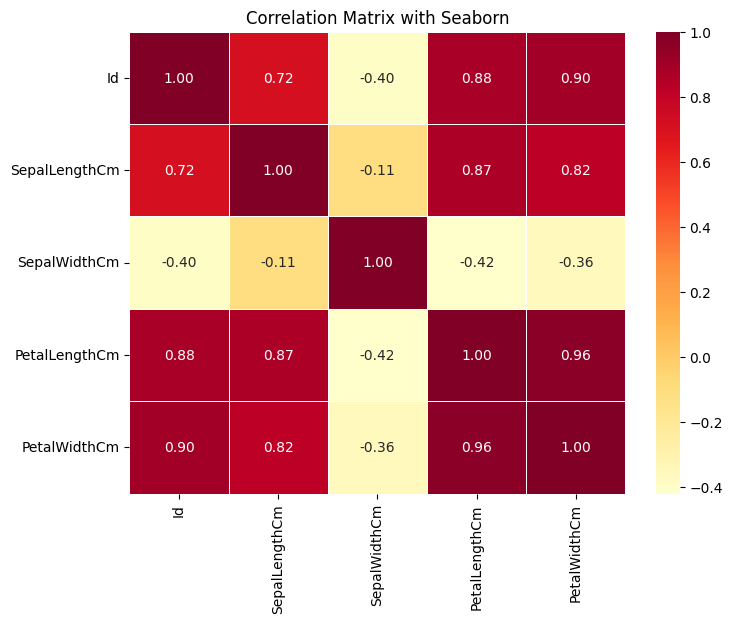

In [ ]:
# Creating a heatmap with Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with Seaborn')
plt.show()

There is high correlation between *petalWidth* and *petalLength*

# Data Spliting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = df.drop(['Species'], axis=1)
Y = df['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=36)

#Logistic Regression

In [ ]:
model = LogisticRegression()

model.fit(X_train, Y_train)

y_pred1 = model.predict(X_test)

accuracy_reg = accuracy_score(Y_test, y_pred1)
conf_matrix_reg = confusion_matrix(Y_test, y_pred1)
classification_rep_reg = classification_report(Y_test, y_pred1)

print(f"Accuracy: {accuracy_reg:.2f}")
print()
print("Confusion Matrix:")
print(conf_matrix_reg)
print()
print("Classification Report:")
print(classification_rep_reg)

Accuracy: 1.00

Confusion Matrix:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


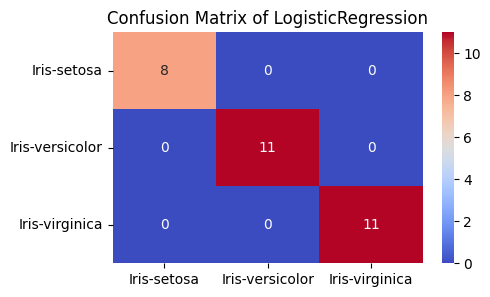

In [ ]:
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_reg, annot=True, fmt='d', cmap='coolwarm', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.title('Confusion Matrix of LogisticRegression')
plt.show()

#KNN Classifier

In [ ]:
model = KNeighborsClassifier()

model.fit(X_train, Y_train)

y_pred2 = model.predict(X_test)

accuracy_knn = accuracy_score(Y_test, y_pred2)
conf_matrix_knn = confusion_matrix(Y_test, y_pred2)
classification_rep_knn = classification_report(Y_test, y_pred2)

print(f"Accuracy: {accuracy_knn:.2f}")
print()
print("Confusion Matrix:")
print(conf_matrix_knn)
print()
print("Classification Report:")
print(classification_rep_knn)

Accuracy: 1.00

Confusion Matrix:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



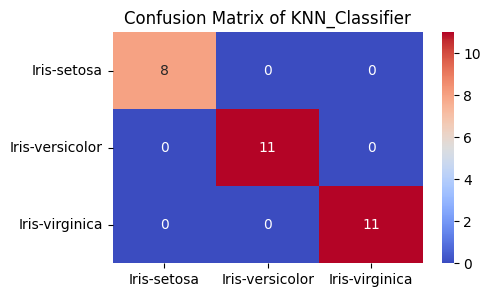

In [ ]:
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.title('Confusion Matrix of KNN_Classifier')
plt.show()

#SVC

In [ ]:
model= SVC()

model.fit(X_train, Y_train)

y_pred3 = model.predict(X_test)

accuracy_svc = accuracy_score(Y_test, y_pred3)
conf_matrix_svc = confusion_matrix(Y_test, y_pred3)
classification_rep_svc = classification_report(Y_test, y_pred3)

print(f"Accuracy: {accuracy_svc:.2f}")
print()
print("Confusion Matrix:")
print(conf_matrix_svc)
print()
print("Classification Report:")
print(classification_rep_svc)

Accuracy: 0.93

Confusion Matrix:
[[ 8  0  0]
 [ 2  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.80      1.00      0.89         8
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30



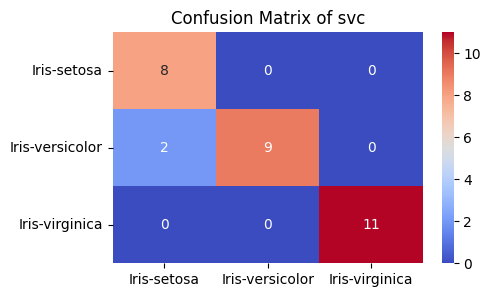

In [ ]:
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='coolwarm', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.title('Confusion Matrix of svc')
plt.show()

#DecisionTree Classifier

In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train, Y_train)

y_pred4 = model.predict(X_test)

accuracy_dt= accuracy_score(Y_test, y_pred4)
conf_matrix_dt = confusion_matrix(Y_test, y_pred4)
classification_rep_dt = classification_report(Y_test, y_pred4)

print(f"Accuracy: {accuracy_dt:.2f}")
print()
print("Confusion Matrix:")
print(conf_matrix_dt)
print()
print("Classification Report:")
print(classification_rep_dt)

Accuracy: 1.00

Confusion Matrix:
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



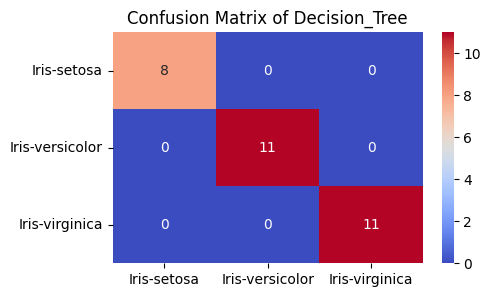

In [ ]:
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.title('Confusion Matrix of Decision_Tree')
plt.show()

#Result

In [ ]:
print(f"Accuracy score (Logistic Regression): {accuracy_reg:.2f}")
print(f"Accuracy score (Knn Classifier): {accuracy_knn:.2f}")
print(f"Accuracy score (Svc): {accuracy_svc:.2f}")
print(f"Accuracy score (Decision Tree): {accuracy_dt:.2f}")

Accuracy score (Logistic Regression): 1.00
Accuracy score (Knn Classifier): 1.00
Accuracy score (Svc): 0.93
Accuracy score (Decision Tree): 1.00


In [ ]:
print("Confusion Matrix for Logistic_Regression")
print(conf_matrix_reg)
print()
print("Confusion Matrix for KNN")
print(conf_matrix_knn)
print()
print("Confusion Matrix for SVC")
print(conf_matrix_svc)
print()
print("Confusion Matrix for Decision_Tree")
print(conf_matrix_dt)

Confusion Matrix for Logistic_Regression
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]

Confusion Matrix for KNN
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]

Confusion Matrix for SVC
[[ 8  0  0]
 [ 2  9  0]
 [ 0  0 11]]

Confusion Matrix for Decision_Tree
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]


#Report

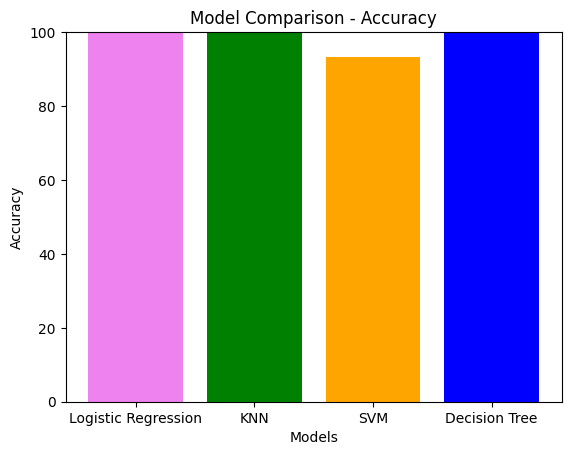

In [ ]:
models = ['Logistic Regression', 'KNN','SVM', 'Decision Tree']
accuracies = [accuracy_reg*100, accuracy_knn*100, accuracy_svc*100 ,accuracy_dt*100]

plt.bar(models, accuracies, color=['violet', 'green', 'orange','blue'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()



** As a  result Logistic_Regression , kNN , Decision_Tree has 100% accuracy **


